# PROBLEM STATEMENT
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

In [61]:
df= pd.read_csv("Titanic-Dataset.csv")

In [62]:
df.shape

(891, 12)

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
df.duplicated().sum()

0

In [67]:
Survived = df['Survived'].value_counts().reset_index()
Survived

,index,Survived
0,0,549
1,1,342


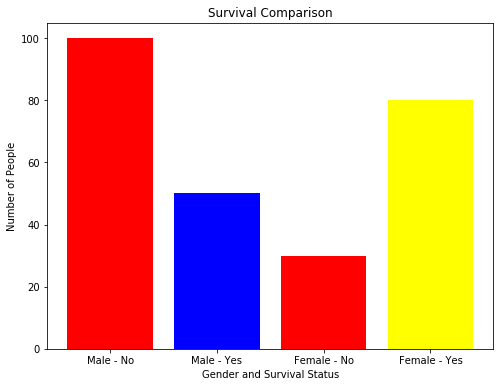

In [68]:
data = {'Survived': ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes'],
        'Counts': [100, 50, 30, 80]}  # replace with actual counts
Survived = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(Survived['Survived'], Survived['Counts'],color=["red","blue","red","yellow"])
plt.xticks(Survived['Survived'])
plt.title('Survival Comparison')
plt.xlabel('Gender and Survival Status')
plt.ylabel('Number of People')
plt.show()


In [69]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [70]:
inputs = df.drop('Survived',axis='columns')
target = df['Survived']
sex=pd.get_dummies(inputs.Sex)
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [71]:
inputs=pd.concat([inputs,sex],axis="columns")
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [72]:
inputs.drop(["Sex"],axis="columns",inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [73]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [74]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [75]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    uint8  
 4   male    891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 22.7 KB


In [76]:
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

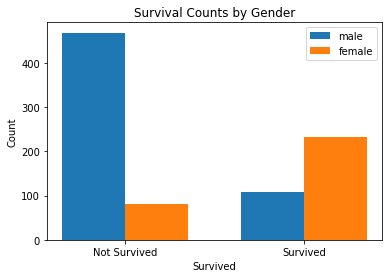

In [77]:
counts = df.groupby(['Survived', 'Sex']).size().unstack().fillna(0)

# Define the bar width
bar_width = 0.35
index = counts.index

# Plotting
fig, ax = plt.subplots()

# Plot bars for each Sex
bar1 = ax.bar(index - bar_width/2, counts['male'], bar_width, label='male')
bar2 = ax.bar(index + bar_width/2, counts['female'], bar_width, label='female')
ax.set_xlabel('Survived')
ax.set_ylabel('Count')
ax.set_title('Survival Counts by Gender')
ax.set_xticks(index)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.legend()

# Display the plot
plt.show()

In [78]:
X_train, X_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2)
X_train

,Pclass,Age,Fare,female,male
232,2,59.000000,13.5000,0,1
177,1,50.000000,28.7125,1,0
137,1,37.000000,53.1000,0,1
389,2,17.000000,12.0000,1,0
557,1,29.699118,227.5250,0,1
...,...,...,...,...,...
321,3,27.000000,7.8958,0,1
848,2,28.000000,33.0000,0,1
205,3,2.000000,10.4625,1,0
391,3,21.000000,7.7958,0,1


In [79]:
X_test

,Pclass,Age,Fare,female,male
447,1,34.000000,26.5500,0,1
584,3,29.699118,8.7125,0,1
272,2,41.000000,19.5000,1,0
528,3,39.000000,7.9250,0,1
317,2,54.000000,14.0000,0,1
...,...,...,...,...,...
244,3,30.000000,7.2250,0,1
143,3,19.000000,6.7500,0,1
616,3,34.000000,14.4000,0,1
239,2,33.000000,12.2750,0,1


In [80]:
y_train

232    0
177    0
137    0
389    1
557    0
      ..
321    0
848    0
205    0
391    1
166    1
Name: Survived, Length: 712, dtype: int64

In [81]:
y_test


447    1
584    0
272    1
528    0
317    0
      ..
244    0
143    0
616    0
239    0
859    0
Name: Survived, Length: 179, dtype: int64

In [82]:
inputs.corr()


,Pclass,Age,Fare,female,male
Pclass,1.000000,-0.331339,-0.549500,-0.131900,0.131900
Age,-0.331339,1.000000,0.091566,-0.084153,0.084153
Fare,-0.549500,0.091566,1.000000,0.182333,-0.182333
female,-0.131900,-0.084153,0.182333,1.000000,-1.000000
male,0.131900,0.084153,-0.182333,-1.000000,1.000000


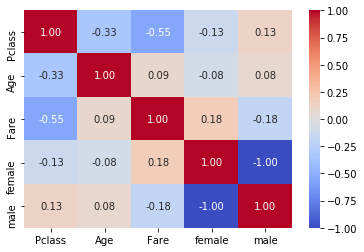

In [83]:
import seaborn as sns
sns.heatmap(inputs.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [84]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

C:\Users\khush\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
model.score(X_test,y_test)

0.8547486033519553

In [86]:
predict=model.predict(X_test)
matrices=r2_score(predict,y_test)
matrices

0.36316365626710456